<a href="https://colab.research.google.com/github/hiteshmishra052/Rain_Prediction_Model/blob/master/Rain_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.The problem statement**

In this kernel, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Logistic Regression with Python and Scikit-Learn.

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

The dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

******

# **2. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn import preprocessing
from scipy import stats

warnings.filterwarnings('ignore')

# **3. Import Dataset**

In [3]:
df = pd.read_csv('/content/weatherAUS.csv')

# **4. Exploratory data analysis**

* We have imported the data.

* Now, its time to explore the data to gain insights about it.

In [4]:
df.shape

(145460, 23)

**Preview the dataset**

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


View Column Names

In [6]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

View the summary of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

View statistical properties of dataset

In [8]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [9]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [10]:
df['RainTomorrow'].isnull().sum()

3267

# **5. Univariate Analysis**

* Explore Rain Tomorrow target variable

* Check for missing values

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Finding all the categorical and continuous values

In [13]:
categorical_col,contin_val = [], []

for i in df.columns:

  if(df[i].dtypes == 'object'):
    categorical_col.append(i)
  else:
    contin_val.append(i)

print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


**Unique Values**

In [14]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

**Checking Null Values**

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

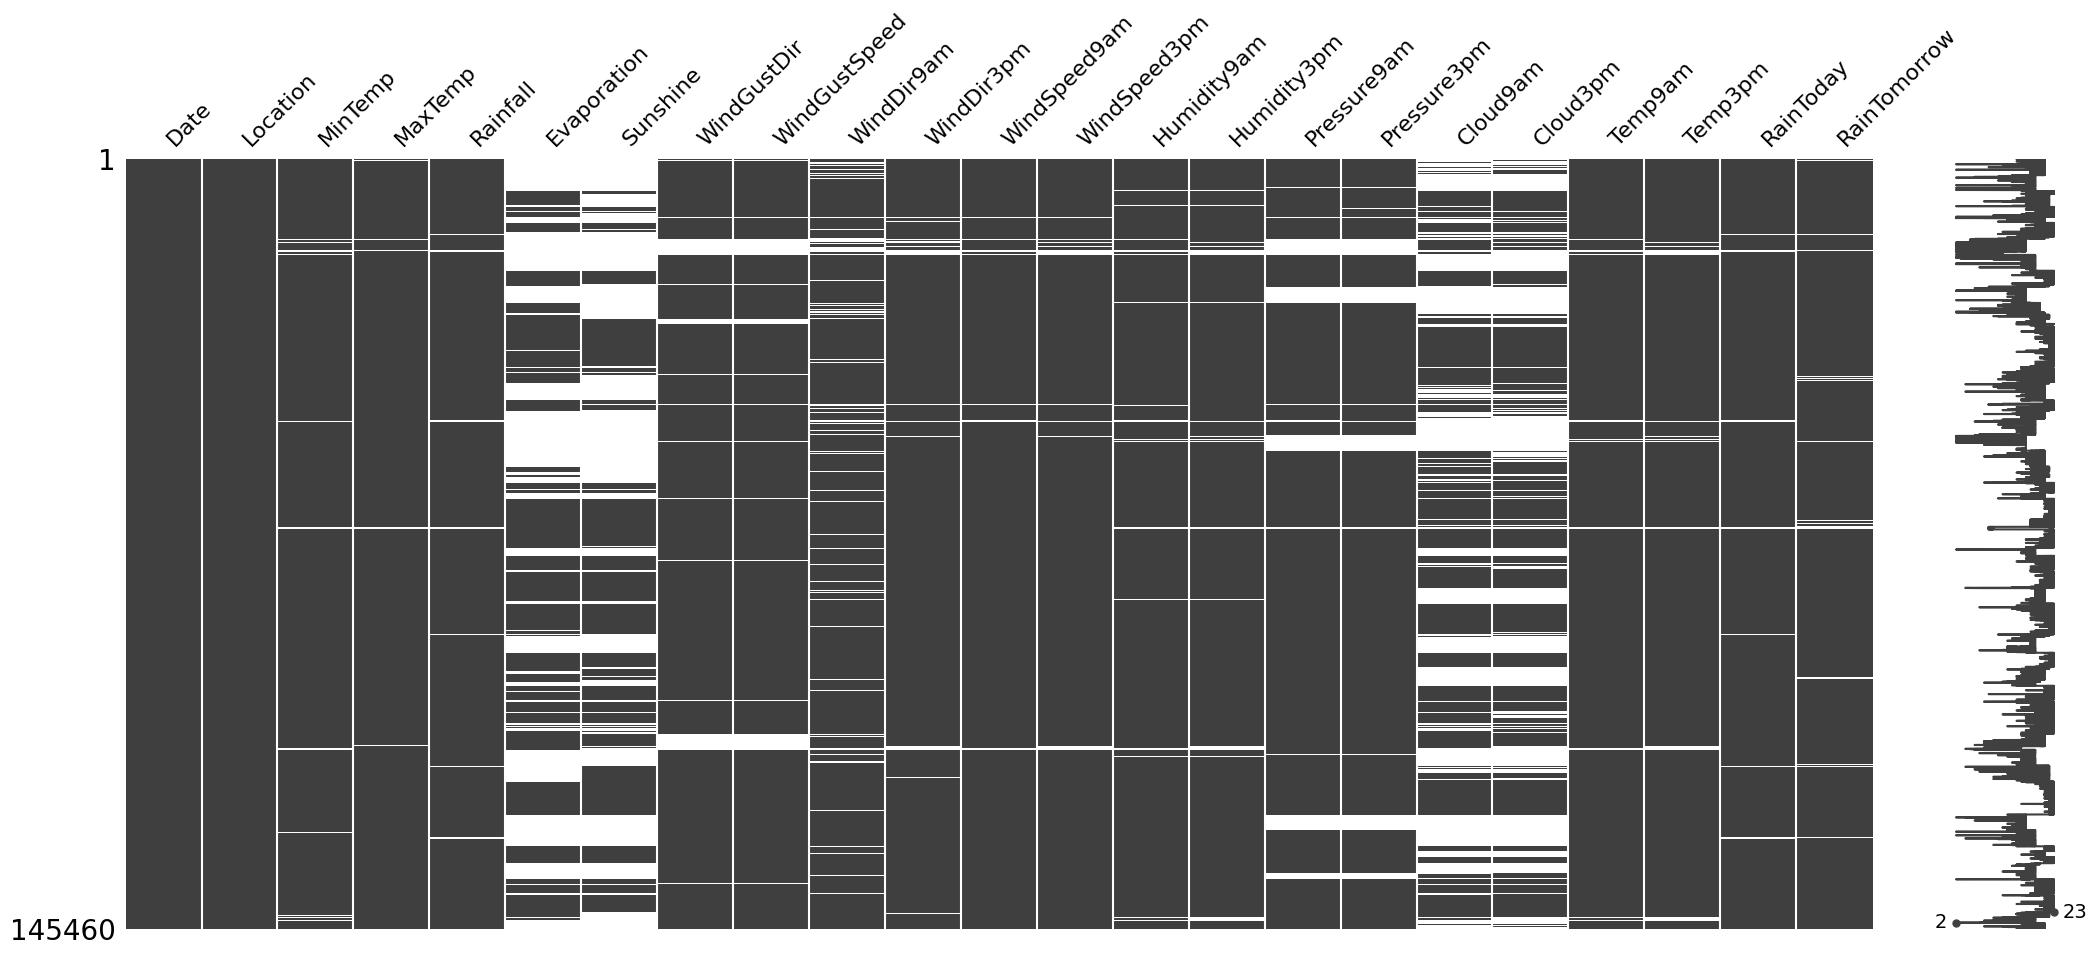

In [16]:
msno.matrix(df)

<Axes: >

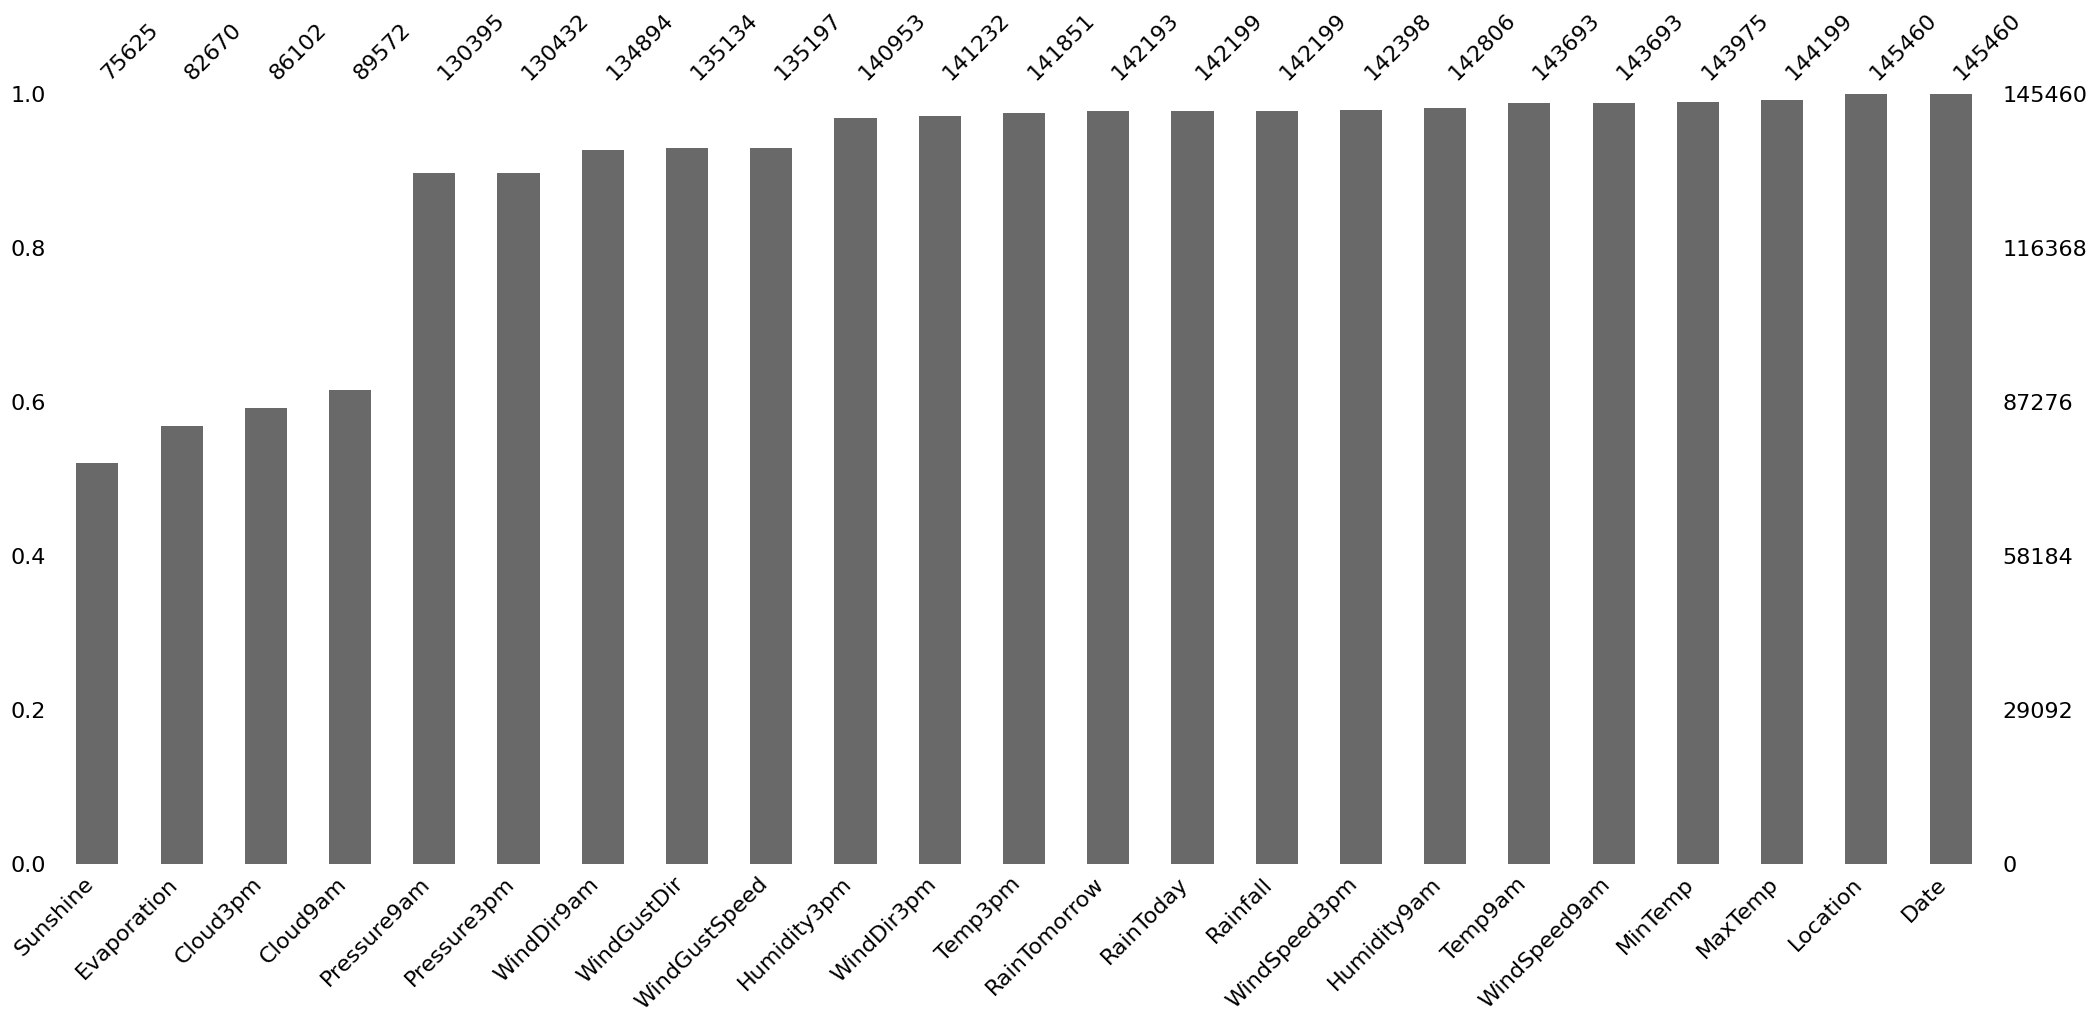

In [17]:
msno.bar(df, sort = 'ascending')

<Axes: >

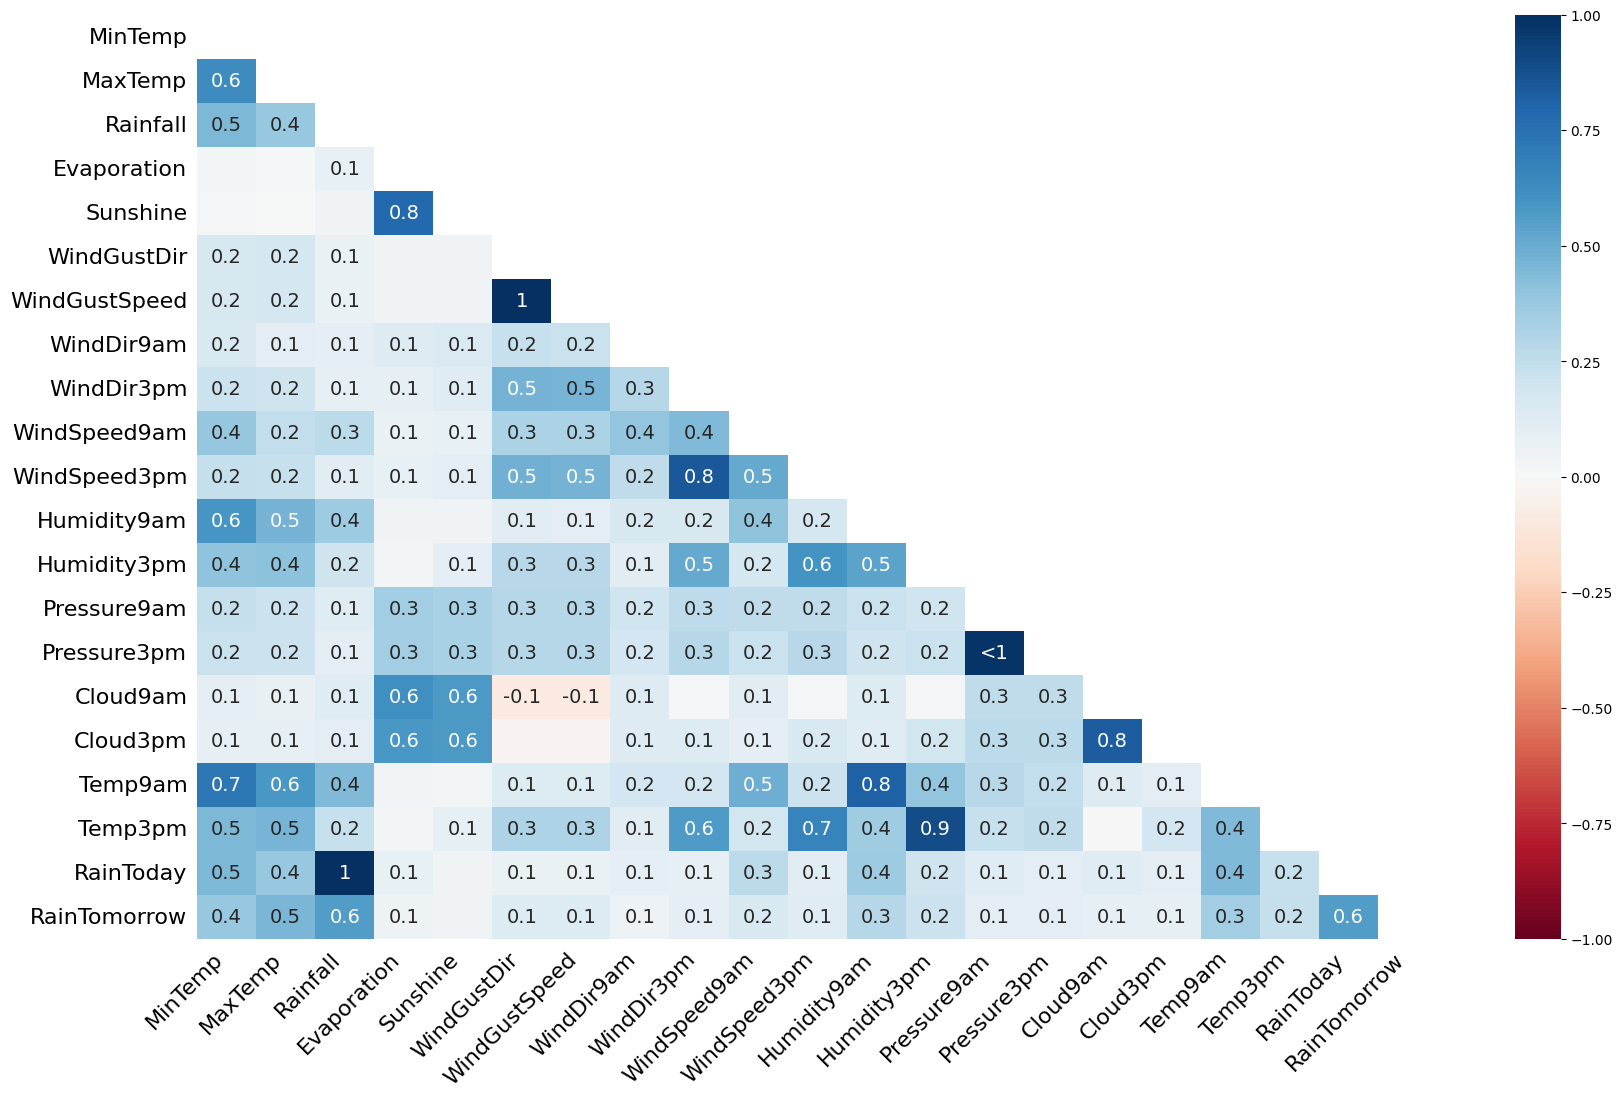

In [18]:
msno.heatmap(df)

The above graphs show that the number of missing values are high in: Sunshine, Evaporation, Cloud3pm and Cloud9am.



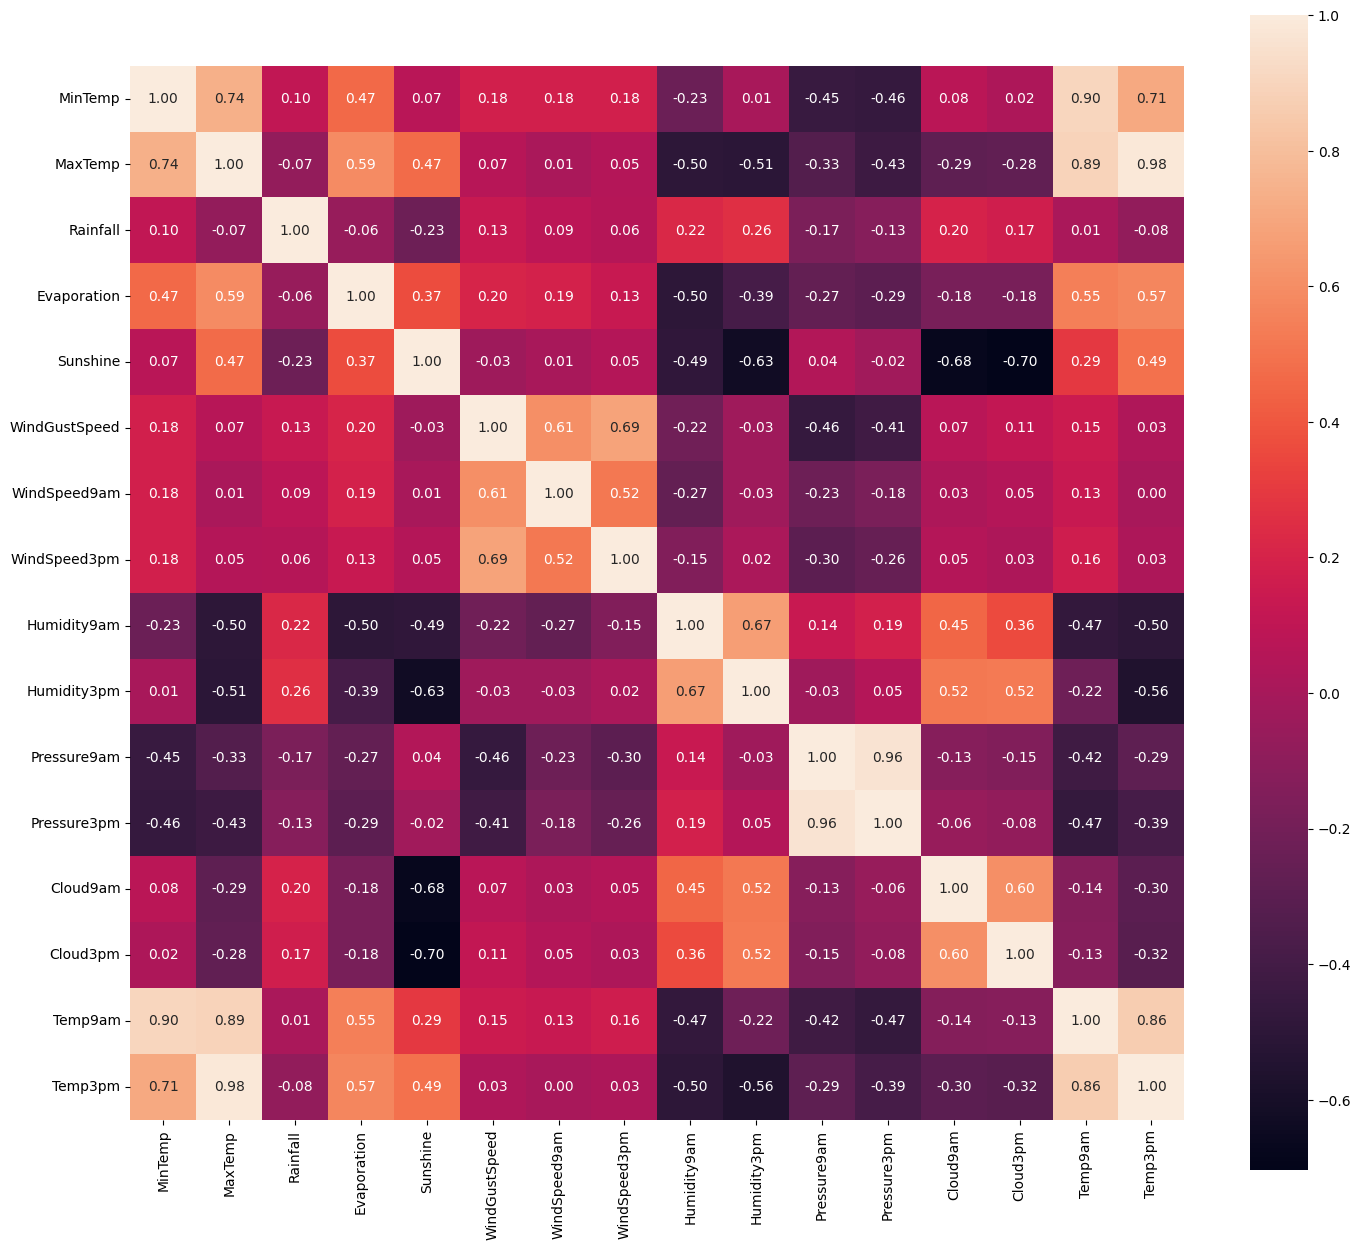

In [19]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

* MinTemp and Temp9am highly correlated.
* MinTemp and Temp3pm highly correlated.
* MaxTemp and Temp9am highly correlated.
* MaxTemp and Temp3pm highly correlated.

* Temp3pm and Temp9am highly correlated.

* Humidity9am and Humidity3pm highly correlated.

**Changing yes and no to 1 and 0 in some columns**

In [20]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1,'No':0})
df['RainToday'] = df['RainToday'].map({'Yes':1,'No':0})

print(df['RainToday'])
print(df['RainTomorrow'])


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


**Dealing with the missing values**

In [21]:
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [23]:
#Filling the missing values for continuous variables with mode

# df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [25]:
#checking % of missing data in every column

(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      0.000000
dtype: float64

In [26]:
df['RainTomorrow'].unique()

array([0., 1.])

In [27]:
df['RainTomorrow'].isnull().sum()

0

**Data Visualization**

Count of rain today and tomorrow

In [28]:
df['RainTomorrow'] = df['RainTomorrow'].map({1:'Yes',0:'No'})
df['RainToday'] = df['RainToday'].map({1:'Yes',0:'No'})

No     110319
Yes     31880
Name: RainToday, dtype: int64
No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

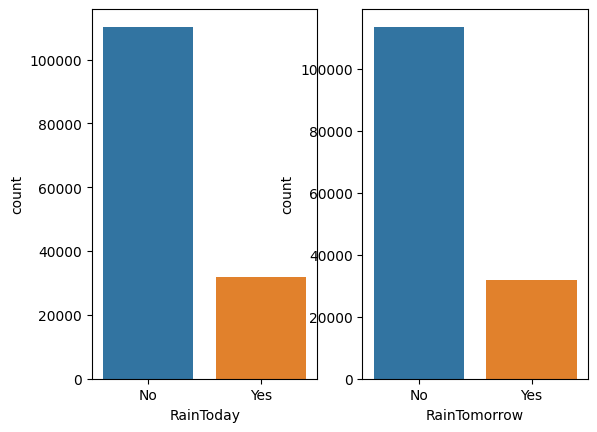

<Figure size 2000x2000 with 0 Axes>

In [29]:
fig, ax = plt.subplots(1,2)
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

plt.figure(figsize = (20,20))
sns.countplot(data = df, x = 'RainToday',ax=ax[0])
sns.countplot(data = df, x = 'RainTomorrow',ax = ax[1])

View percentage of frequency of distribution of values

In [30]:
df['RainTomorrow'].value_counts()/len(df)

No     0.780854
Yes    0.219146
Name: RainTomorrow, dtype: float64

Interpretation

In [31]:
print(f"For the Rain Tomorrow Feature")
print(f"Yes is {0.780854*100}% times")
print(f"No is {0.219146*100}% times")

For the Rain Tomorrow Feature
Yes is 78.0854% times
No is 21.9146% times


Findings of Univariate Analysis
The number of unique values in RainTomorrow variable is 2.

The two unique values are No and Yes.

Out of the total number of RainTomorrow values, No appears 78.0854% times and Yes appears 21.9146% times.

The univariate plot confirms our findings that :-

The No variable have 113583 entries, and

The Yes variable have 31877 entries

***

# **6 . Bivariate Analysis**

Types of variables

In this we will segregate the dataset into categorical and numerical variables.

* Categorical values of data type object
* Numerical values of data type float64



Explore Categorical Variables

In [32]:
categorical =  [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [33]:
#View the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [34]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow        0
dtype: int64

In [35]:
#view frequncy distribution of categorical variables

for var in categorical:
  print(df[var].value_counts()/np.float(len(df)))

2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa 

In [36]:
# check for cardinality in categorical variables

for var in categorical:
  print(var, 'contains',len(df[var].unique()),'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 2 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables

**Feature Engineering of Date Variable**

In [37]:
df['Date'].dtypes

dtype('O')

As the datatype of date column is object we need to convert this into datetime format

In [38]:
#parse the dates , currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtypes

dtype('<M8[ns]')

In [39]:
#extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()



0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [40]:
#extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [41]:
#extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [42]:
#again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [43]:
#drop the original date variable

df = df.drop('Date',axis='columns')


In [44]:
#preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Explore categorical variables one by one


In [45]:
#find the categorical variables

categorical =  [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [46]:
#check for missing values in categorical variables

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow        0
dtype: int64

We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday variables contain missing values. We will explore these variables one by one.

**Explore Location Variable**

In [47]:
#print the no of labels in location variable

print('Location contains', len(df.Location.unique()),'labels')

Location contains 49 labels


In [48]:
#check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [49]:
#check the frequency distribution of values in Location variable

df['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [50]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first = True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Explore WindGustDir variable**

In [51]:
#print number of labels in WindGustDir variable

print('WindGustDir contains',len(df['WindGustDir'].unique()),' labels')

WindGustDir contains 17  labels


In [52]:
#check the labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [53]:
#check the frequncy distributoj of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [54]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)


ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

We can see that there are 10326 missing values in WindGustDir variable.

**Explore WindDir9am variable**

In [56]:
#print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [57]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [58]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [59]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

**Explore WindDir3pm variable**

In [61]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [62]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [63]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [64]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [65]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

**Explore RainToday variable**

In [66]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [67]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [68]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [69]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [70]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 3261 missing values

**Explore Numerical Variables**

In [71]:
#find the numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:',numerical)

There are 19 numerical variables

The numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [72]:
#view the numericalvariables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


**Summary of numerical variables**
* There are 16 numerical variables.
* These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
* All of the numerical variables are of continuous type

Explore the problems within numerical variables

Missing values in numerical variables

In [73]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

We can see there are 16 numerical variables containing missing values

**Outliers in numerical variables**

In [74]:
#view summary statics in numerical variables
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers

Text(0, 0.5, 'WindSpeed3pm')

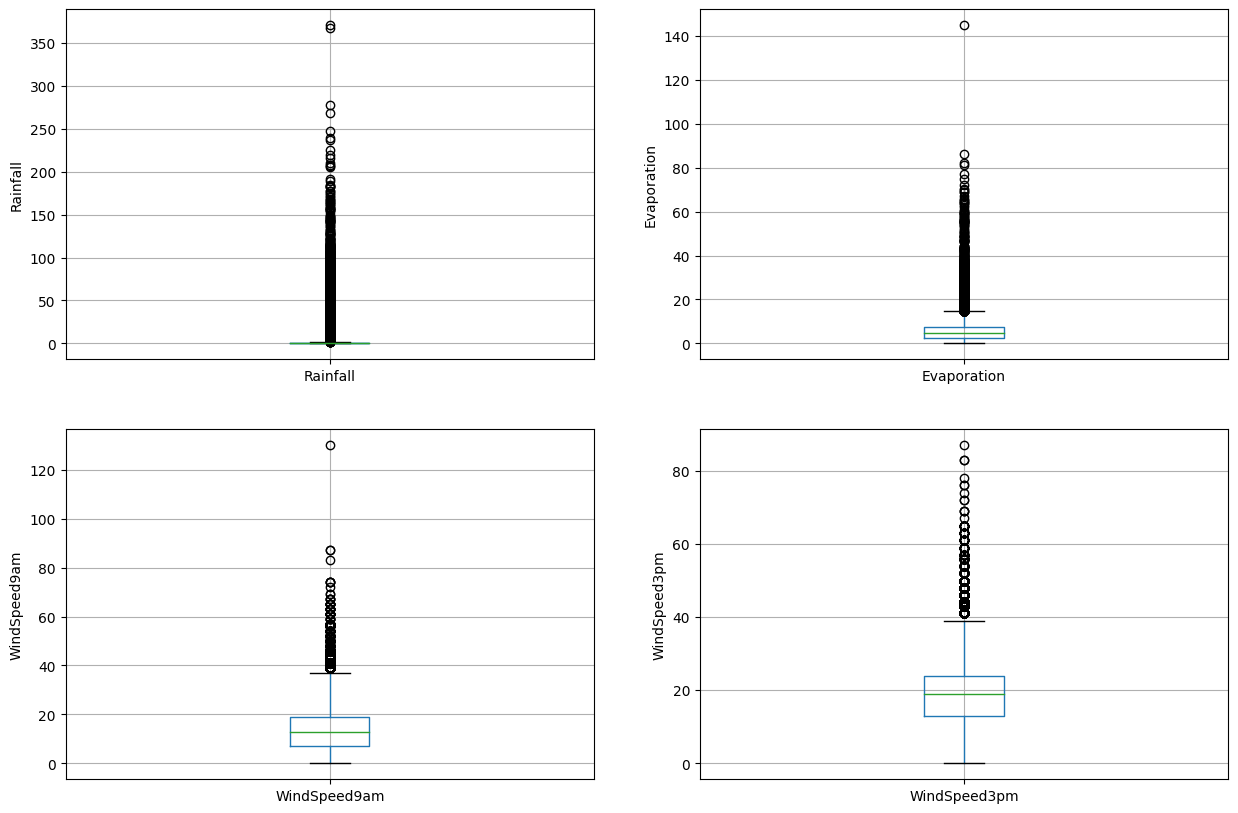

In [75]:
#draw the boxplots to visualize outliers in the above variables

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column = 'WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')



**Check the distribution of variables**

* Now, we will plot the histograms to check distributions to find out if they are normal or skewed.

* If the variable follows normal distribution, then we will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

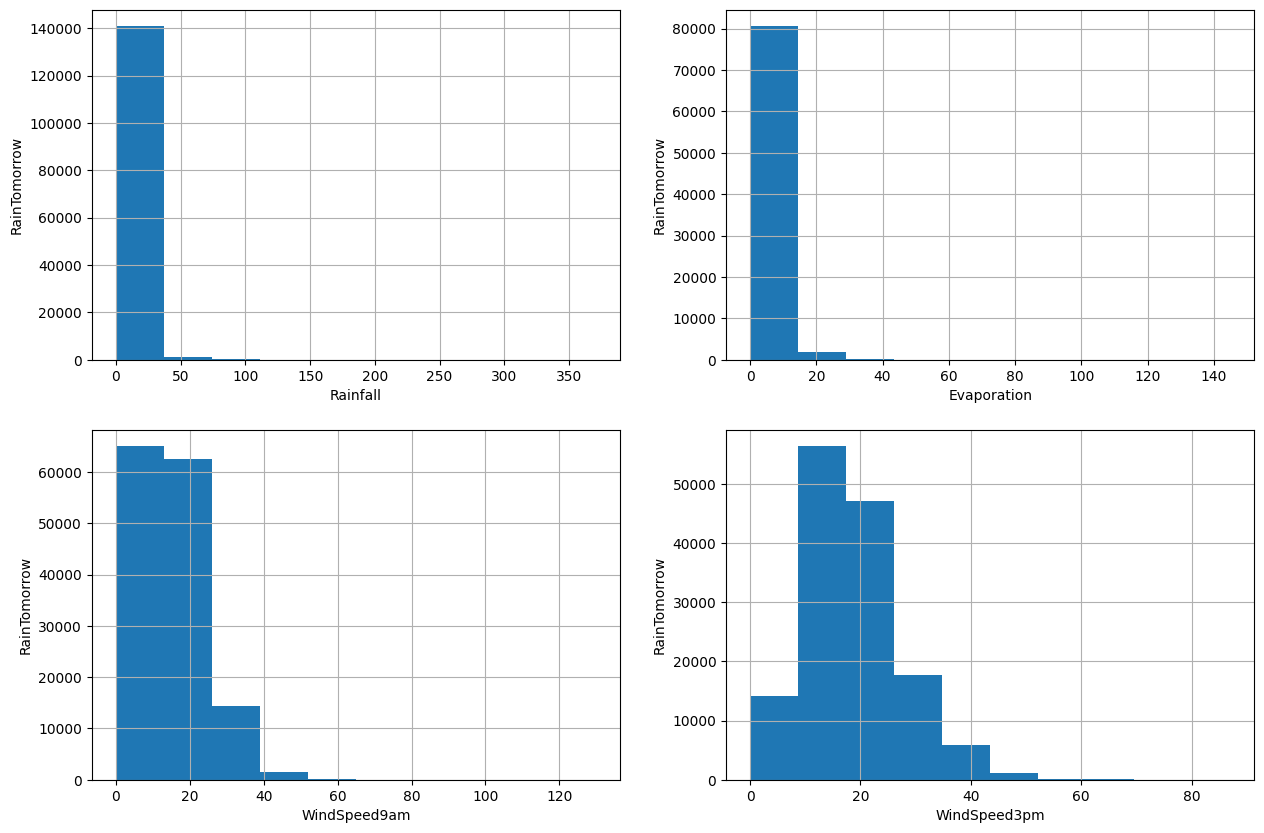

In [76]:
#plot the histogram to check the distribution

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df['Rainfall'].hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig = df['Evaporation'].hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,3)
fig = df['WindSpeed9am'].hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,4)
fig = df['WindSpeed3pm'].hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



In [77]:
#find the oultiers for Rainfall Variable

Q1 = df['Rainfall'].describe()[4]
Q2 = df['Rainfall'].describe()[6]
IQR = Q2 - Q1
Lower_fence = Q1 - (IQR * 3)
Upper_fence = Q2 + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [78]:
df['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [79]:
#find the oultiers for Evaporation Variable

Q1 = df['Evaporation'].describe()[4]
Q2 = df['Evaporation'].describe()[6]
IQR = Q2 - Q1
Lower_fence = Q1 - (IQR * 3)
Upper_fence = Q2 + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -11.800000000000002 or > 21.800000000000004


In [80]:
df['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [81]:
#find the oultiers for WindSpeed9am Variable

Q1 = df['WindSpeed9am'].describe()[4]
Q2 = df['WindSpeed9am'].describe()[6]
IQR = Q2 - Q1
Lower_fence = Q1 - (IQR * 3)
Upper_fence = Q2 + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -29.0 or > 55.0


In [82]:
df['WindSpeed9am'].describe()

count    143693.000000
mean         14.043426
std           8.915375
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [83]:
#find the oultiers for WindSpeed3pm Variable

Q1 = df['WindSpeed3pm'].describe()[4]
Q2 = df['WindSpeed3pm'].describe()[6]
IQR = Q2 - Q1
Lower_fence = Q1 - (IQR * 3)
Upper_fence = Q2 + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -20.0 or > 57.0


In [84]:
df['WindSpeed3pm'].describe()

count    142398.000000
mean         18.662657
std           8.809800
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

# **7.Multivariate Analysis**

* An important step in EDA is to discover patterns and relationships between variables in the dataset.

* We will use heat map and pair plot to discover the patterns and relationships in the dataset.

* First of all, We will draw a heat map.

In [85]:
correlation = df.corr()

Heat Map

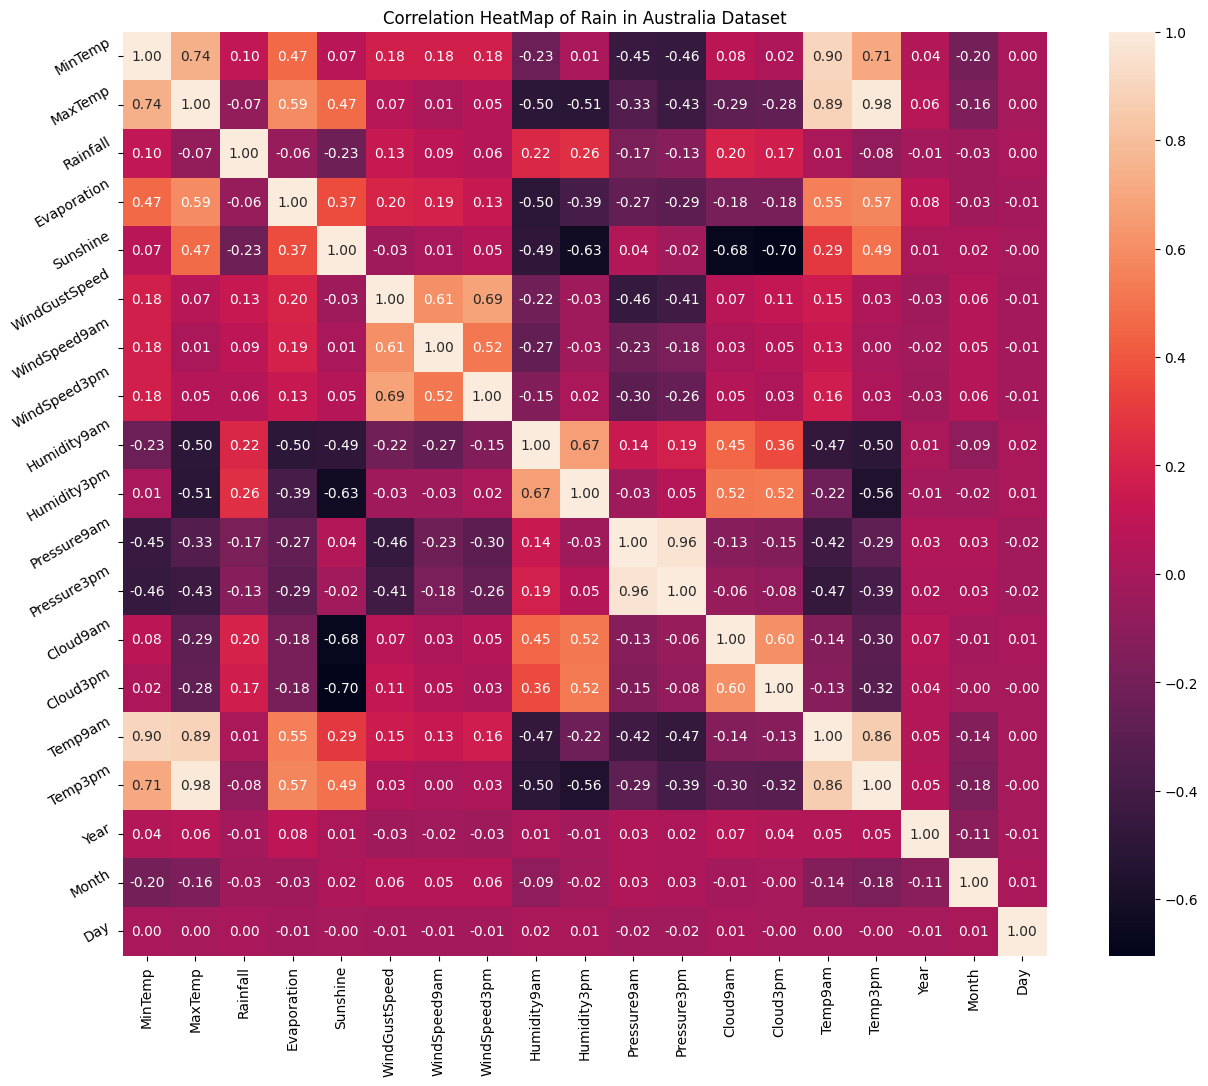

In [86]:
plt.figure(figsize = (16,12))
plt.title('Correlation HeatMap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True,annot=True,fmt='.2f',linecolor = 'white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

**Interpretation**
From the above correlation heat map, we can conclude that :-

* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

* MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

* MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

* MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

* WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

* Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

* Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

**Pair Plot**

First of all, I will define extract the variables which are highly positively correlated.

In [87]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

Now, I will draw pairplot to depict relationship between these variables.

In [88]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

**Interpretation**
* I have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

* The above pair plot shows relationship between these variables.

# **8. Declare feature vector and target variable**

In [89]:
X = df.drop(['RainTomorrow'],axis=1)

y = df['RainTomorrow']

# **9. Split data into separate training and test set**

In [90]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
#check the shape of X_train and X_test

X_train.shape, X_test.shape

# **10. Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. We will carry out feature engineering on different types of variables.

First, We will display the categorical and numerical variables again separately.

In [92]:
#check data types in X_train

X_train.dtypes

In [93]:
#display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

In [94]:
#display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

Engineering missing values in numerical variables

In [95]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

In [96]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

In [97]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
  if X_train[col].isnull().mean()>0:
    print(col, round(X_train[col].isnull().mean(),4))

**Assumption**
* We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, we will use median imputation because median imputation is robust to outliers.

* We will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [98]:
#impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
  for col in numerical:
    col_median = X_train[col].median()
    df1[col].fillna(col_median, inplace = True)

In [99]:
#check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

In [100]:
#check missing values in  numerical variables in X_test

X_test[numerical].isnull().sum()

Now, we can see that there are no missing values in the numerical columns of training and test set

**Engineering missing values in categorical variables**

In [101]:
#print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

In [102]:
#print categorical variables with missing data

for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col, (X_train[col].isnull().mean()))

In [103]:
#impute mising categoricak variables with most frequent values

for df2 in [X_train, X_test]:
  df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0],inplace=True)
  df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0],inplace=True)
  df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0],inplace=True)
  df2['RainToday'].fillna(X_train['RainToday'].mode()[0],inplace=True)

In [104]:
#now check the missing values

X_test[categorical].isnull().sum()

Finally checking the missing values in X_train & X_test

In [105]:
#checking the missing values in Test data

X_test.isnull().sum()

In [106]:
#checking the missing values in Train data

X_train.isnull().sum()

Observation - There are no missing values in test and train data

**Engineering outliers in numerical variables**

As we have seen that the Rainfall, Evaporation,WindSpeed9am and WindSpeed3pm


In [107]:
def max_value(df3,variable,top):
  return np.where(df3[variable]>top, top,df3[variable])

for df3 in [X_train, X_test]:
  df3['Rainfall'] = max_value(df3,'Rainfall',3.2)
  df3['Evaporation'] = max_value(df3,'Evaporation',21.8)
  df3['WindSpeed9am'] = max_value(df3,'WindSpeed9am',55)
  df3['WindSpeed3pm'] = max_value(df3,'WindSpeed3pm',57)

In [108]:
X_train.Rainfall.max(),X_test.Rainfall.max()

In [109]:
X_train.Evaporation.max(),X_test.Evaporation.max()

In [110]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

In [111]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

In [ ]:
X_train[numerical].describe()

We can now see that the outliers in Rinafall, Evaporation, WindSpeed9am, and WindSpeed3pm columns are capped

**Encode categorical values**

In [ ]:
#print categorical values

categorical

In [ ]:
X_train[categorical].head()

In [ ]:
#encode RainToday variable
!pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

We can see two additional variables RainToday_0 and RainToday_1 are created from RainToday variable

In [ ]:
X_train = pd.concat([X_train[numerical],X_train[['RainToday_0','RainToday_1']], pd.get_dummies(X_train.Location),pd.get_dummies(X_train.WindGustDir),pd.get_dummies(X_train.WindDir9am),pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

Similarly we will do it for X_test testing set

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

# **11. Feature Scaling**

In [ ]:
X_train.describe()

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **12.** **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression(solver='liblinear',random_state=0)

#fit the model
logreg.fit(X_train, y_train)

# **13. Predict Results**

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

predict_proba method

* **predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

* 0 is for probability of no rain and 1 is for probability of rain

In [129]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.83215823, 0.74551076, 0.79860387, ..., 0.42025444, 0.6575465 ,
       0.96954917])

In [130]:
#probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.16784177, 0.25448924, 0.20139613, ..., 0.57974556, 0.3424535 ,
       0.03045083])

# **14. Check accuracy score**

In [131]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8484


As we can see y_test in the known values and y_pred_test are the predicted values so checked the accuracy which comes to be 85%

Compare the train-set and test-set accuracy

In [132]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [133]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8488


Check for overfitting and underfitting

In [134]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8488
Test set score: 0.8484


In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

We will increase C and fit a more flexible model.

In [135]:
#fit the Logistic Regression model with C=100

#instantiate the model
logreg100 = LogisticRegression(C=100,solver='liblinear',random_state=0)

#fit the model
logreg100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [136]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8489
Test set score: 0.8491


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [137]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [138]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8427
Test set score: 0.8418


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relative to the default parameters.

**Compare model accuracy with null accuracy**
So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [139]:
#check the class distribution in test set

y_test.value_counts()

No     22726
Yes     6366
Name: RainTomorrow, dtype: int64

We can see that the occurences of most frequent class is 22726. So, we can calculate null accuracy by dividing 22726 by total number of occurences.

In [141]:
#check the null accuracy score

null_accuracy = ((22726)/(22726+6366))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7812


**Interpretation**
* We can see that our model accuracy score is **0.8488** but null accuracy score is 0.7812.
* So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

* But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

* We have another tool called Confusion matrix that comes to our rescue

# **15. Confusion Matrix**

In [143]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n',cm)

print('\nTrue Positives(TP) = ',cm[0,0])

print('\nTrue Negatives(TP) = ',cm[1,1])

print('\nFalse Positives(TP) = ',cm[0,1])

print('\nFalse Negatives(TP) = ',cm[1,0])

Confusion matrix

 [[21543  1183]
 [ 3227  3139]]

True Positives(TP) =  21543

True Negatives(TP) =  3139

False Positives(TP) =  1183

False Negatives(TP) =  3227


The confusion matrix shows 21543 + 3139 = 24177 correct predictions and 3227 + 1183 = 4262 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 21543
* True Negatives (Actual Negative:0 and Predict Negative:0) - 3139
* False Positives (Actual Negative:0 but Predict Positive:1) - 1183 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 3227 (Type II error)

<Axes: >

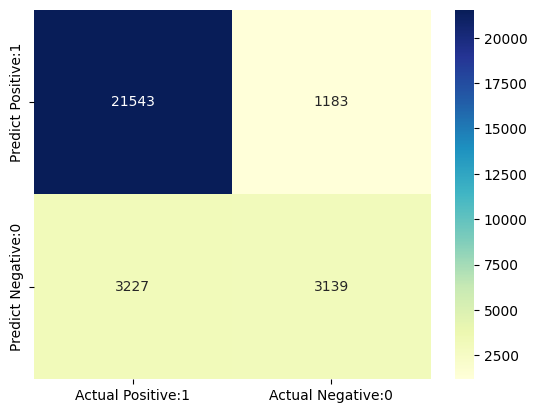

In [145]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification Metrics**


**Classificaton Report**

In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.73      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



**Classification Accuracy**

In [147]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [149]:
#print classificaiton accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8484


**Classification Error**

In [150]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1516


# **17. Model evaluation and Improvement**

In this section, We will employ several techniques to improve the model performance. We will discuss 3 techniques which are used in practice for performance improvement. These are recursive feature elimination, k-fold cross validation and hyperparameter optimization using GridSearchCV

***
**k-Fold Cross Validation**
***

In [153]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84802784 0.84927387 0.84940277 0.8450565  0.84879474]


We can summarize the cross-validation accuracy by calculating its mean

In [154]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8481


Our, original model score is found to be 0.8488. The average cross-validation score is 0.8481. So, we can conclude that cross-validation does not result in performance improvement.

# **18. Results and Conclusion**

1. The logistic regression model accuracy score is 0.8488. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2. Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3. The model shows no signs of overfitting.

4. Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5. Our, original model score is found to be 0.8488. The average cross-validation score is 0.8481. So, we can conclude that cross-validation does not result in performance improvement.

